In [92]:
import re

In [107]:
bench_names = []
benchs = []

with open('res.csv', 'r') as f:
    lines = f.readlines()
    
    count = 0 # Use to avoid first 6 lines
    last_name = ""
    bench = -1
    
    for line in lines:
        if (count < 6):
            count += 1
            continue
        
        # Get name of bench
        name = re.search('32m(.+?)/', line).group(1)
        if name != last_name:
            bench += 1
            benchs.append([[], []])
            bench_names.append(name)
            last_name = name
        
        # Get size of bench
        size = int(re.search('/(.+?)/real_time', line).group(1))
        
        # Get duration of bench
        time = float(re.search('33m(.+?)us', line).group(1).strip())
        
        # Save bench data.
        benchs[bench][0].append(size)
        benchs[bench][1].append(time)

print(benchs)
print(bench_names)

[[[8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288], [207.0, 218.0, 244.0, 271.0, 351.0, 545.0, 931.0, 1658.0, 3489.0, 7805.0, 17746.0, 48892.0, 102467.0, 245824.0, 584506.0, 1239489.0, 2459871.0]], [[8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288], [19.0, 36.0, 69.0, 136.0, 269.0, 537.0, 1088.0, 2222.0, 4324.0, 8660.0, 17561.0, 35612.0, 75407.0, 155572.0, 339152.0, 770901.0, 1557934.0]], [[8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288], [312.0, 686.0, 1345.0, 2735.0, 5823.0, 11292.0, 24328.0, 49006.0, 107700.0, 313105.0, 845793.0, 2352151.0, 4703037.0, 9014966.0, 16201552.0, 36228959.0, 71088033.0]], [[8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288], [214.0, 221.0, 233.0, 263.0, 304.0, 405.0, 598.0, 972.0, 1738.0, 3265.0, 6332.0, 22870.0, 45354.0, 68284.0, 129464.0, 250921.0, 531544.0

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plot(benchs, xname, yname, color):
    x = []
    y = []
    colors = []
    for i in range(len(bench_names)):
        for j in range(len(benchs[i])):
            x += benchs[i][0]
            y += benchs[i][1]
            for k in range(len(benchs[i][0])):
                colors.append(color[i]) 

    fig = plt.figure()
    plt.scatter(np.array(x), #+ np.random.uniform(0, 1, len(x)),
                np.array(y), #+ np.random.uniform(0, 0.1,len(y)),
                linestyle='-',
                c=colors, marker='.')
    fig.suptitle('Quicksort benchmark (CTPL: Red, Single:Green, Bomb:Blue, CLFTPL:Black)')
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.loglog(x, y, linestyle='None')
    plt.savefig('save.png', dpi=1000)
    plt.show()

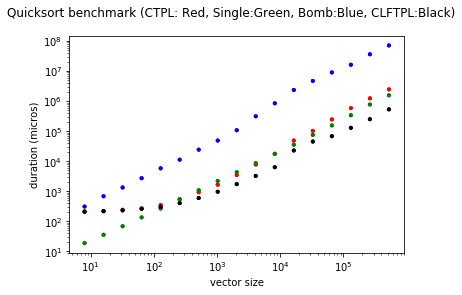

In [109]:
colors = ['red', 'green', 'blue', 'black']
plot(benchs, 'vector size', 'duration (micros)', colors)

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plot2(benchs, xname, yname, color):
    x = []
    y = []
    colors = []
    for i in range(len(bench_names)):
        for j in range(len(benchs[i])):
            x += benchs[i][0]
            y += benchs[i][1]
            for k in range(len(benchs[i][0])):
                colors.append(color[i]) 

    fig = plt.figure()
    plt.scatter(np.array(x), #+ np.random.uniform(0, 1, len(x)),
                np.array(y), #+ np.random.uniform(0, 0.1,len(y)),
                linestyle='-',
                c=colors, marker='.')
    fig.suptitle('Quicksort benchmark on 262.144 vector size (CTPL: Red, Single:Green, Bomb:Blue, CLFTPL:Black)')
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.savefig('save.png', dpi=1000)
    plt.show()

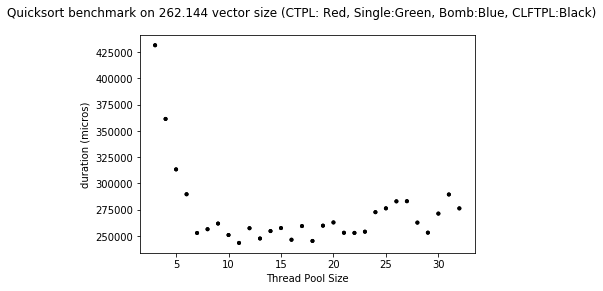

In [106]:
colors = ['red', 'green', 'blue', 'black']
plot2(benchs, 'Thread Pool Size', 'duration (micros)', colors)